<a href="https://colab.research.google.com/github/darlonvitor/DataScience-primeiros-passos---Alura/blob/master/Introdu%C3%A7%C3%A3o_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analizando notas

In [ ]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.columns = ["usuarioId","filmeId","nota","data"]
notas.head()

,usuarioId,filmeId,nota,data
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
print("Média ",notas['nota'].mean())
print("Mediana ",notas.nota.median())

Média  3.501556983616962
Mediana  3.5


In [ ]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

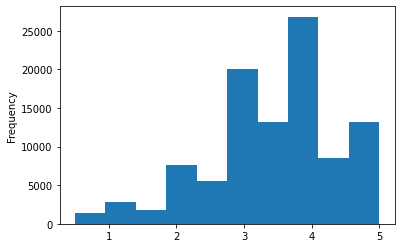

In [ ]:
notas.nota.plot(kind="hist")

In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


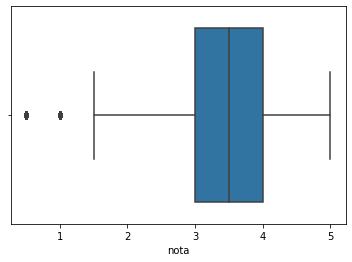

In [ ]:
#!pip install seaborn==0.9.0
import seaborn as sns
sns.boxplot(notas.nota)

#Carregando Filmes

In [ ]:
filmes = pd.read_csv("movies.csv")

In [ ]:
filmes.columns = ["filmeId","titulo","genero"]

In [ ]:
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analizando notas de um filme especifico

In [ ]:
notas.query("filmeId==1").head()

,usuarioId,filmeId,nota,data
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


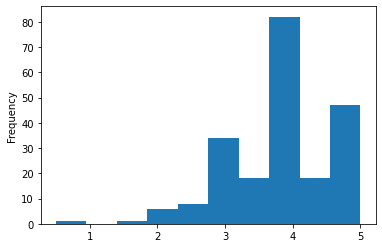

In [ ]:
notas.query("filmeId==1").nota.plot(kind="hist")

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64


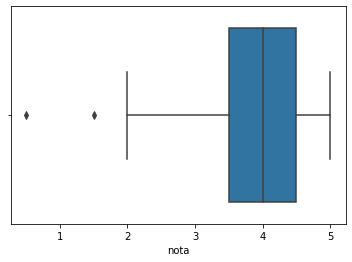

In [ ]:
print(notas.query("filmeId==1").nota.describe())
sns.boxplot(notas.query("filmeId==1").nota)

In [ ]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

Agrupando notas pela coluna 'filmeId'

In [ ]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

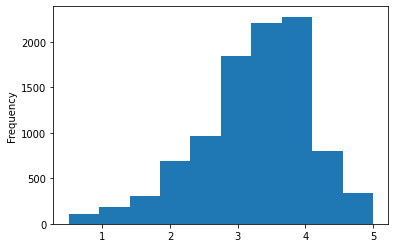

In [ ]:
medias_por_filme.plot(kind="hist")

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64


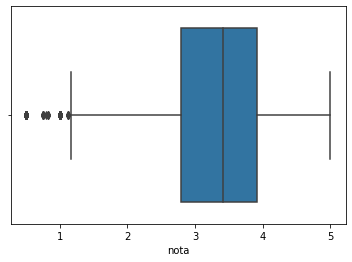

In [ ]:
sns.boxplot(medias_por_filme)
print(medias_por_filme.describe())

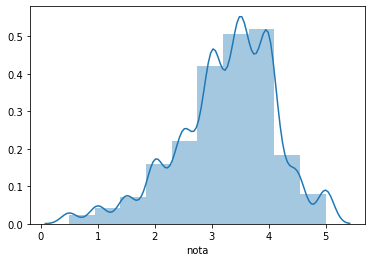

In [ ]:
sns.distplot(medias_por_filme,bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

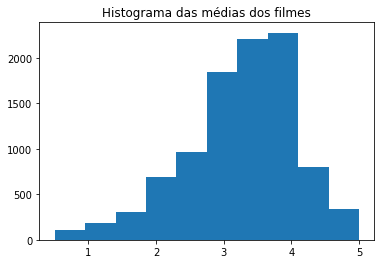

In [ ]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64


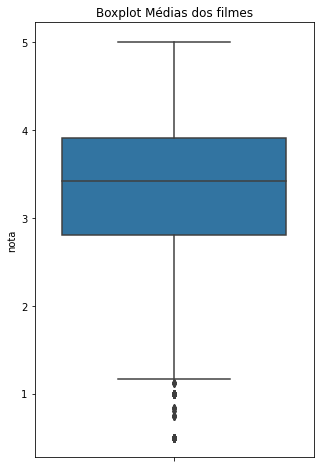

In [ ]:
plt.figure(figsize=(5,8))
plt.title("Boxplot Médias dos filmes")
sns.boxplot(y=medias_por_filme)
print(medias_por_filme.describe())

In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0


#Visualização dos dados

en    2367
fr      19
zh      13
ja       7
ru       6
cn       6
es       5
de       5
ko       2
hi       1
nl       1
te       1
it       1
ta       1
Name: original_language, dtype: int64


Text(0.5, 1.0, 'Dez línguas mais presentes na amostra (exceto EN)')

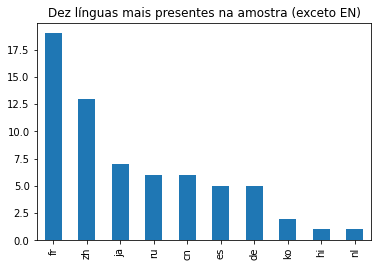

In [ ]:
print(tmdb["original_language"].value_counts())
tmdb.original_language.value_counts()[1:11].plot(kind="bar") #categórica nominal
plt.title("Dez línguas mais presentes na amostra (exceto EN)")

In [ ]:
linguas = tmdb.original_language.value_counts().to_frame().reset_index()
linguas.columns = ["original_language", "total"]
linguas.head()

,original_language,total
0,en,2367
1,fr,19
2,zh,13
3,ja,7
4,ru,6


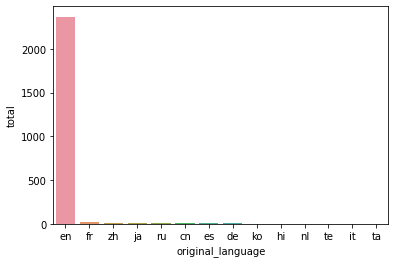

In [ ]:
sns.barplot(x="original_language",y="total",data=linguas)

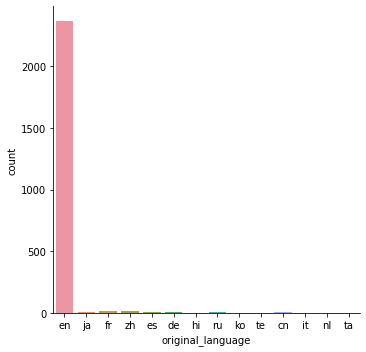

In [ ]:
sns.catplot(x="original_language",kind="count",data=tmdb)

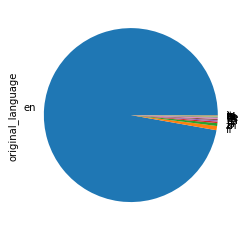

In [ ]:
tmdb.original_language.value_counts().plot(kind="pie")

([<matplotlib.patches.Wedge at 0x7f72f0b0b518>,
 [Text(-1.0957693797927701, 0.09638187749036796, 'en'),
  Text(1.0874913124609855, -0.16541658115764346, 'fr'),
  Text(1.093392038229083, -0.12039040965646587, 'zh'),
  Text(1.096134218690085, -0.09213997295786835, 'ja'),
  Text(1.0975253770399418, -0.0737431132603825, 'ru'),
  Text(1.098535501060826, -0.0567428665916731, 'cn'),
  Text(1.0992301410636445, -0.04114725965602744, 'es'),
  Text(1.0996695148438866, -0.02696216094846878, 'de'),
  Text(1.099868167809058, -0.01702978098348999, 'ko'),
  Text(1.0999258435670312, -0.012772574265001295, 'hi'),
  Text(1.0999551396137577, -0.009934326211621932, 'nl'),
  Text(1.0999771118589305, -0.007096012012787063, 'te'),
  Text(1.099991760156253, -0.00425765056676735, 'it'),
  Text(1.0999990844081922, -0.0014192607721480325, 'ta')])

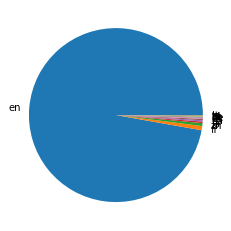

In [ ]:
plt.pie(linguas.total,labels=linguas["original_language"])

In [ ]:
total_geral = linguas.total.sum()
total_ingles = linguas.loc[0].total
total_outros = total_geral-total_ingles
print(total_geral,total_ingles,total_outros)

2435 2367 68


In [ ]:
dados = pd.DataFrame({
    'lingua':['ingles','outros'],
    'total':[total_ingles,total_outros]
})

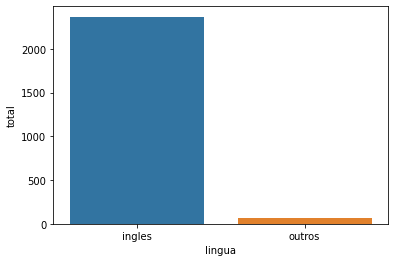

In [ ]:
sns.barplot(x='lingua',y='total',data=dados)

([<matplotlib.patches.Wedge at 0x7f72f0a52d68>,
 [Text(-1.0957693797927701, 0.09638187749036796, 'ingles'),
  Text(1.0957693769727939, -0.0963819095507842, 'outros')])

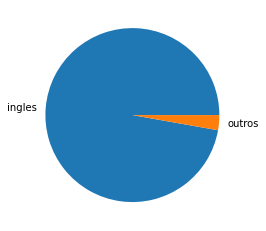

In [ ]:
plt.pie(dados['total'],labels=dados['lingua'])

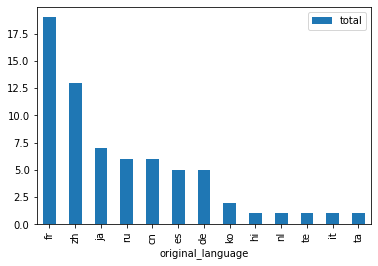

In [ ]:
linguas.query("original_language != 'en'").plot(kind="bar",x="original_language",y="total")

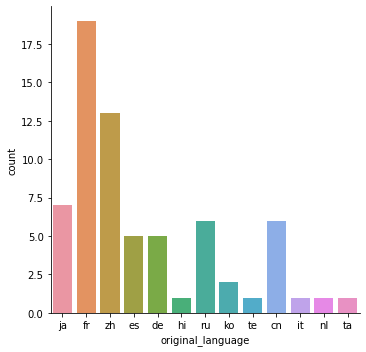

In [ ]:
sns.catplot(x="original_language",data = tmdb.query("original_language != 'en'"),kind="count")

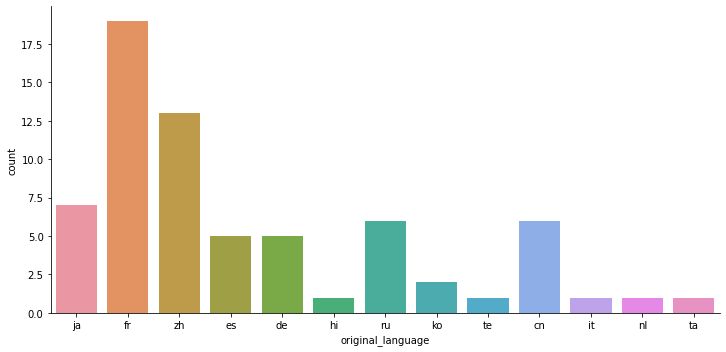

In [ ]:
#mudando a razao de aspecto
sns.catplot(x="original_language",
            data = tmdb.query("original_language != 'en'"),
            kind="count",
            aspect=2)

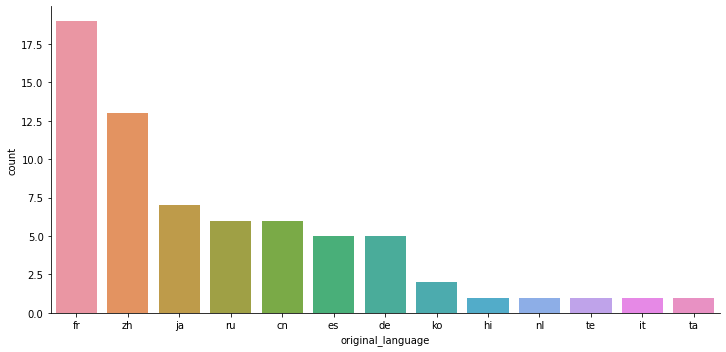

In [ ]:
#ordenando do mais frequente para o menos
sns.catplot(x="original_language",
            data = tmdb.query("original_language != 'en'"),
            kind="count",
            aspect=2,
            order = linguas.original_language[1:])

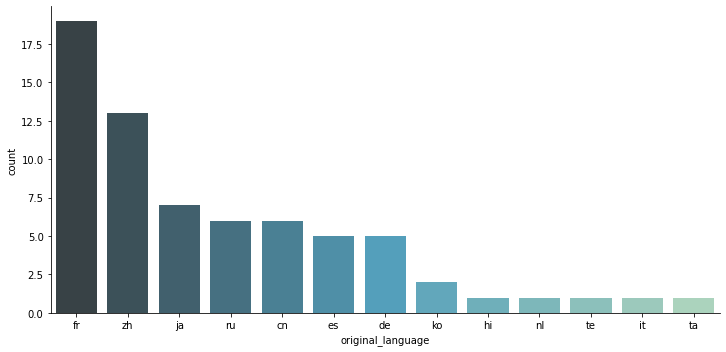

In [ ]:
#Modificando a paleta de cores
sns.catplot(x="original_language",
            data = tmdb.query("original_language != 'en'"),
            kind="count",
            aspect=2,
            order = linguas.original_language[1:],
            palette = "GnBu_d")

#Revisando o papel de medidas de tendência central, dispersão e suas visualizaões (histogramas, barras e box plot)

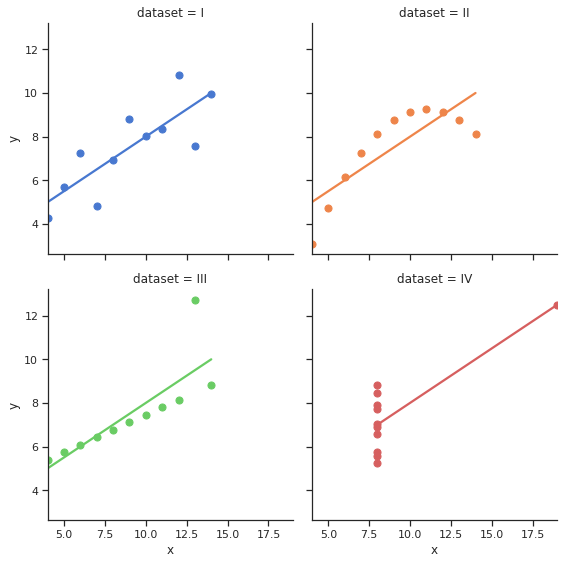

In [ ]:
sns.set(style="ticks")
df = sns.load_dataset("anscombe")
sns.lmplot(x="x",
           y="y",
           col="dataset", 
           hue="dataset",
           data=df,
           col_wrap=2,
           ci=None,
           palette="muted",
           height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [ ]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas_toy_story = notas.query("filmeId == 1")
notas_jumanji = notas.query("filmeId == 2")
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [ ]:
print("Nota média do Toy Story %.2f" %notas_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" %notas_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [ ]:
print("Mediana do Toy Story %.2f" %notas_toy_story.nota.median())
print("Mediana do Jumanji %.2f" %notas_jumanji.nota.median())

Mediana do Toy Story 4.00
Mediana do Jumanji 3.50


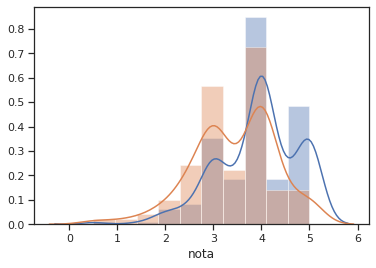

In [ ]:
sns.distplot(notas_toy_story.nota, bins=10)
sns.distplot(notas_jumanji.nota,bins=10)

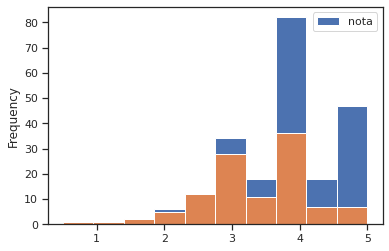

In [ ]:
notas_toy_story.nota.plot(kind="hist")
notas_jumanji.nota.plot(kind="hist")

{'boxes': [<matplotlib.lines.Line2D at 0x7f72e60a7438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f72e60a7eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f72e60b7a20>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f72e60b7668>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f72e60a7748>,
  <matplotlib.lines.Line2D at 0x7f72e603f518>]}

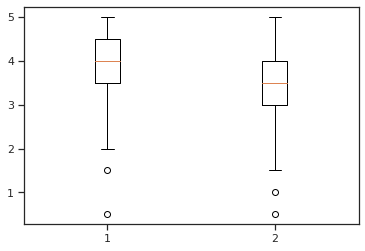

In [ ]:
plt.boxplot([notas_toy_story.nota,notas_jumanji.nota])

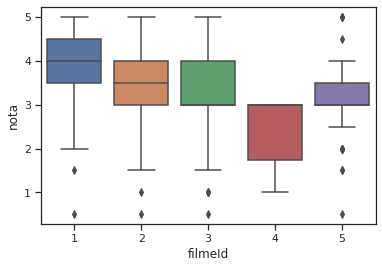

In [ ]:
sns.boxplot(x="filmeId",y="nota",data=notas.query("filmeId in [1,2,3,4,5]"))